<a href="https://colab.research.google.com/github/Lucas-procopio/Data-Analysis/blob/main/Unicorns_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [202]:
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

In [203]:
# Reading data
data_set = pd.read_csv("Startups+in+2021+end.csv")

In [204]:
# Looking Dimension
data_set.shape

(936, 8)

In [205]:
# First files
data_set.head()

,Unnamed: 0,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Investors
0,0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
3,3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [206]:
# Columns
data_set.columns

Index(['Unnamed: 0', 'Company', 'Valuation ($B)', 'Date Joined', 'Country',
       'City', 'Industry', 'Select Investors'],
      dtype='object')

In [207]:
# Renaming
data_set.rename( columns={
    'Unnamed: 0': 'Id',
    'Company': 'Empresa',
    'Valuation ($B)' : 'Valor ($)',
    'Date Joined' : 'Data de Adesão',
    'Country' : 'Pais',
    'City' : 'Cidade',
    'Industry' : 'Setor',
    'Select Investors' : 'Investidores',
}, inplace=True ) # Inplace parameter is used to imput changes on dataset origin 

In [208]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 936 entries, 0 to 935
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Id              936 non-null    int64 
 1   Empresa         936 non-null    object
 2   Valor ($)       936 non-null    object
 3   Data de Adesão  936 non-null    object
 4   Pais            936 non-null    object
 5   Cidade          921 non-null    object
 6   Setor           936 non-null    object
 7   Investidores    935 non-null    object
dtypes: int64(1), object(7)
memory usage: 58.6+ KB


In [209]:
# Couting quantity data is null
data_set.isnull().sum()

Id                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
Pais               0
Cidade            15
Setor              0
Investidores       1
dtype: int64

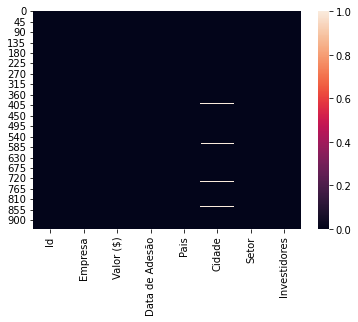

In [210]:
# Imput to graph
sns.heatmap(data_set.isnull())

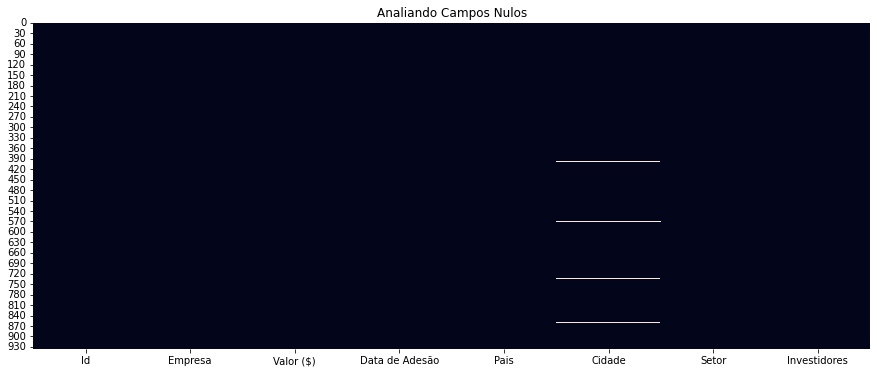

In [211]:
# Imput to graph more complex
plt.figure( figsize=(15,6))
plt.title('Analiando Campos Nulos')
sns.heatmap( data_set.isnull(), cbar=False); # cbar is used to remove scalas bar 
# When we are plotting a graph, if we used to ; in the end to comand,
# we'll get only a figure without text closer

In [212]:
# Unique fields
data_set.nunique()

Id                936
Empresa           935
Valor ($)         192
Data de Adesão    589
Pais               47
Cidade            239
Setor              17
Investidores      920
dtype: int64

In [213]:
data_set['Setor'].nunique()

17

In [214]:
data_set['Setor'].unique()

array(['Artificial intelligence', 'Other', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics', 'Edtech',
       'E-commerce & direct-to-consumer', 'Hardware', 'Health',
       'Consumer & retail', 'Auto & transportation', 'Finttech',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Artificial Intelligence'], dtype=object)

In [215]:
# unique values
data_set['Setor'].value_counts()

Fintech                                190
Internet software & services           167
E-commerce & direct-to-consumer        102
Artificial intelligence                 69
Health                                  63
Supply chain, logistics, & delivery     51
Other                                   51
Cybersecurity                           41
Mobile & telecommunications             37
Data management & analytics             36
Hardware                                32
Auto & transportation                   29
Edtech                                  27
Consumer & retail                       23
Travel                                  13
Artificial Intelligence                  4
Finttech                                 1
Name: Setor, dtype: int64

In [216]:
# unique values
data_set['Setor'].value_counts(normalize= True) 

Fintech                                0.202991
Internet software & services           0.178419
E-commerce & direct-to-consumer        0.108974
Artificial intelligence                0.073718
Health                                 0.067308
Supply chain, logistics, & delivery    0.054487
Other                                  0.054487
Cybersecurity                          0.043803
Mobile & telecommunications            0.039530
Data management & analytics            0.038462
Hardware                               0.034188
Auto & transportation                  0.030983
Edtech                                 0.028846
Consumer & retail                      0.024573
Travel                                 0.013889
Artificial Intelligence                0.004274
Finttech                               0.001068
Name: Setor, dtype: float64

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16],
 <a list of 17 Text major ticklabel objects>)

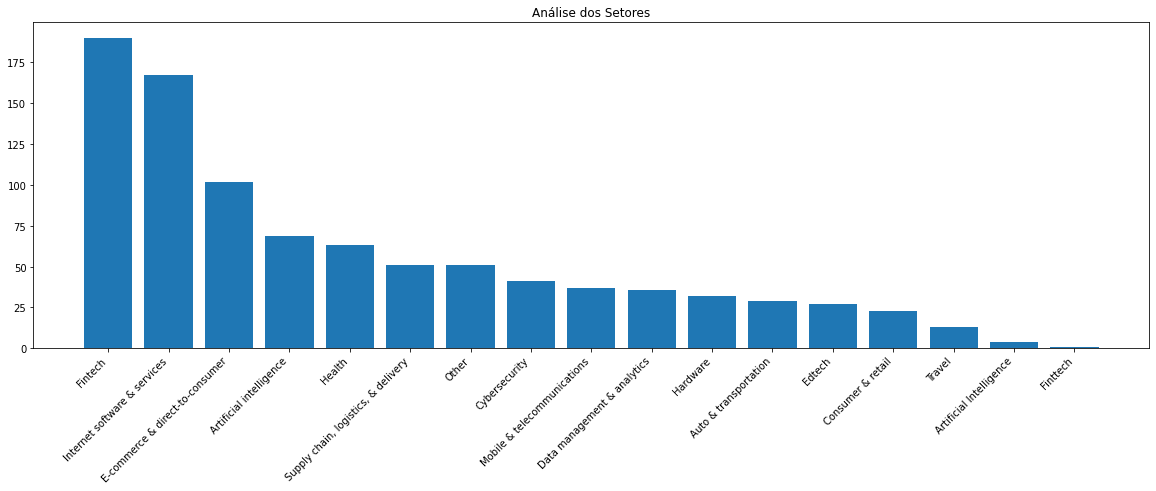

In [217]:
plt.figure( figsize=(20,6))
plt.title(f'Análise dos Setores')
plt.bar(data_set['Setor'].value_counts().index, data_set['Setor'].value_counts());
plt.xticks(rotation=45, ha='right') # rotation axis x to right

In [218]:
analysis = round(data_set['Pais'].value_counts(normalize=True) * 100, 1)

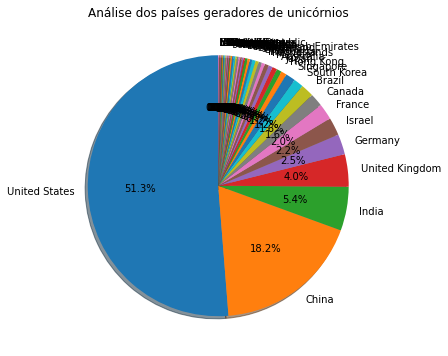

In [219]:
# Plot geral of countries 
plt.figure(figsize=(15,6))
plt.title(f'Análise dos países geradores de unicórnios')
plt.pie(
    analysis,
    labels = analysis.index,
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

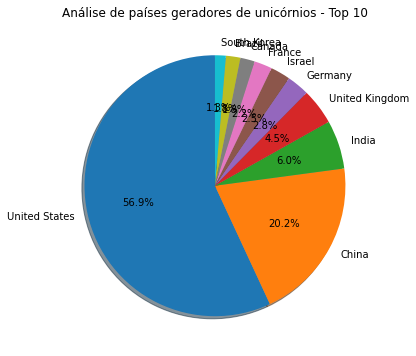

In [220]:
# Plot top 10 countries
plt.figure(figsize=(15,6))
plt.title(f'Análise de países geradores de unicórnios - Top 10')
plt.pie(
    analysis.head(10),
    labels = analysis.index[0:10],
    shadow=True,
    startangle=90,
    autopct='%1.1f%%'
);

In [221]:
# Converting data
data_set['Data de Adesão'] = pd.to_datetime(data_set['Data de Adesão'])
data_set['Data de Adesão'].head()

0   2017-04-07
1   2012-12-01
2   2014-01-23
3   2011-12-12
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [222]:
# Extracting year and month
data_set['Mes'] = pd.DatetimeIndex(data_set['Data de Adesão']).month
data_set['Ano'] = pd.DatetimeIndex(data_set['Data de Adesão']).year


data_set.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,$45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [223]:
analysis_grouping = data_set.groupby( by=['Pais', 'Ano', 'Mes', 'Empresa']).count()['Id'].reset_index()

analysis_grouping

,Pais,Ano,Mes,Empresa,Id
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1
933,United States,2021,12,YipitData,1
934,"United States,",2021,9,TrialSpark,1


In [224]:
analysis_grouping.loc[ # loc parameter like where command
      analysis_grouping['Pais'] == 'United States'
]

,Pais,Ano,Mes,Empresa,Id
457,United States,2011,4,Vice Media,1
458,United States,2012,6,Fanatics,1
459,United States,2012,12,Avant,1
460,United States,2012,12,SpaceX,1
461,United States,2013,2,Mu Sigma,1
...,...,...,...,...,...
929,United States,2021,12,Iodine Software,1
930,United States,2021,12,Jokr,1
931,United States,2021,12,Panther Labs,1
932,United States,2021,12,ReliaQuest,1


In [225]:
 analysis_grouping.loc[
          analysis_grouping['Pais'] == 'Brazil'
 ]

,Pais,Ano,Mes,Empresa,Id
12,Brazil,2018,3,Nubank,1
13,Brazil,2018,7,Movile,1
14,Brazil,2018,11,iFood,1
15,Brazil,2019,6,Loggi,1
16,Brazil,2019,9,QuintoAndar,1
17,Brazil,2019,10,EBANX,1
18,Brazil,2019,12,Wildlife Studios,1
19,Brazil,2020,1,Loft,1
20,Brazil,2020,12,C6 Bank,1
21,Brazil,2020,12,Creditas,1


In [226]:
# Changing $ on 'Valor ($)' columns and converting to integer

data_set['Valor ($)'] = pd.to_numeric(data_set['Valor ($)'].apply( lambda Linha: Linha.replace('$','') ))

data_set.head()

,Id,Empresa,Valor ($),Data de Adesão,Pais,Cidade,Setor,Investidores,Mes,Ano
0,0,Bytedance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,100.3,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
3,3,Klarna,45.6,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",12,2011
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [244]:
# Analytic table
analysis_country = data_set.groupby(by=['Pais']).sum()['Valor ($)'].reset_index()

analysis_country_order = analysis_country.sort_values('Valor ($)', ascending=False)

analysis_country_order

,Pais,Valor ($)
44,United States,1604.03
8,China,569.48
43,United Kingdom,150.29
18,India,148.45
16,Germany,66.63
5,Brazil,61.05
38,Sweden,58.08
1,Australia,50.60
22,Israel,43.82
17,Hong Kong,41.45


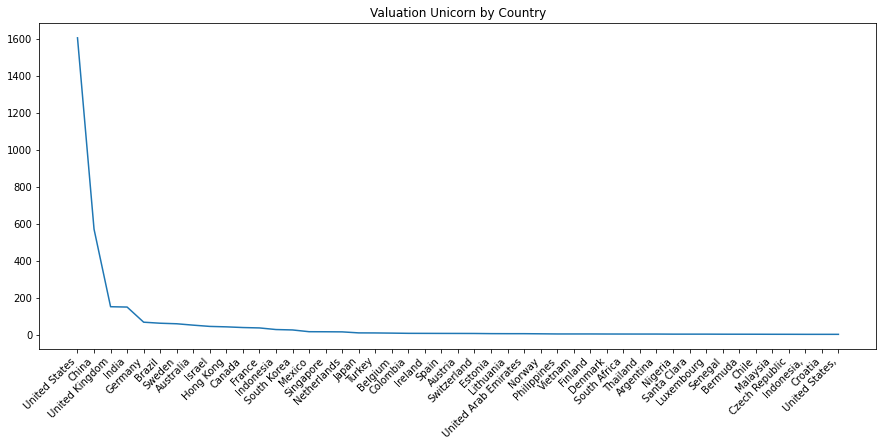

In [251]:
plt.figure(figsize=(15,6))
plt.title('Valuation Unicorn by Country')
plt.plot(analysis_country_order['Pais'], analysis_country_order['Valor ($)'] )
plt.xticks(rotation=45, ha='right');